In [ ]:
# from alpha_vantage.timeseries import TimeSeries
# ts = TimeSeries(key='FJUN1WZFGMLHV93F', output_format='pandas')
# df, meta_data = ts.get_intraday(symbol='AAPL', interval='1min', outputsize='full')
# df

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2025-03-11 19:59:00,220.99,221.0700,220.8000,220.9700,733.0
2025-03-11 19:58:00,221.00,221.0699,220.7800,221.0500,276.0
2025-03-11 19:57:00,221.00,221.0500,220.7800,220.9800,1471.0
2025-03-11 19:56:00,221.07,221.0700,220.9335,221.0300,356.0
2025-03-11 19:55:00,221.07,221.0700,220.9600,221.0696,458.0
...,...,...,...,...,...
2025-02-10 04:04:00,228.78,228.9000,228.6300,228.7400,710.0
2025-02-10 04:03:00,228.89,228.9500,228.7900,228.8200,1410.0
2025-02-10 04:02:00,228.70,228.9500,228.6900,228.9500,919.0


In [3]:
# df.to_csv('AAPL.csv')

In [4]:
import pandas as pd
df = pd.read_csv('AAPL.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2025-03-11 19:59:00,220.99,221.0700,220.8000,220.9700,733.0
2025-03-11 19:58:00,221.00,221.0699,220.7800,221.0500,276.0
2025-03-11 19:57:00,221.00,221.0500,220.7800,220.9800,1471.0
2025-03-11 19:56:00,221.07,221.0700,220.9335,221.0300,356.0
2025-03-11 19:55:00,221.07,221.0700,220.9600,221.0696,458.0
...,...,...,...,...,...
2025-02-10 04:04:00,228.78,228.9000,228.6300,228.7400,710.0
2025-02-10 04:03:00,228.89,228.9500,228.7900,228.8200,1410.0
2025-02-10 04:02:00,228.70,228.9500,228.6900,228.9500,919.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20083 entries, 2025-03-11 19:59:00 to 2025-02-10 04:00:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    20083 non-null  float64
 1   2. high    20083 non-null  float64
 2   3. low     20083 non-null  float64
 3   4. close   20083 non-null  float64
 4   5. volume  20083 non-null  float64
dtypes: float64(5)
memory usage: 941.4 KB


In [6]:
df.isna().sum()
# df = df.filna(method='ffill')

1. open      0
2. high      0
3. low       0
4. close     0
5. volume    0
dtype: int64

### no null values

In [7]:
df.columns = ['open', 'high', 'low', 'close', 'volume']

# EDA

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [9]:
df.sort_index(inplace=True)

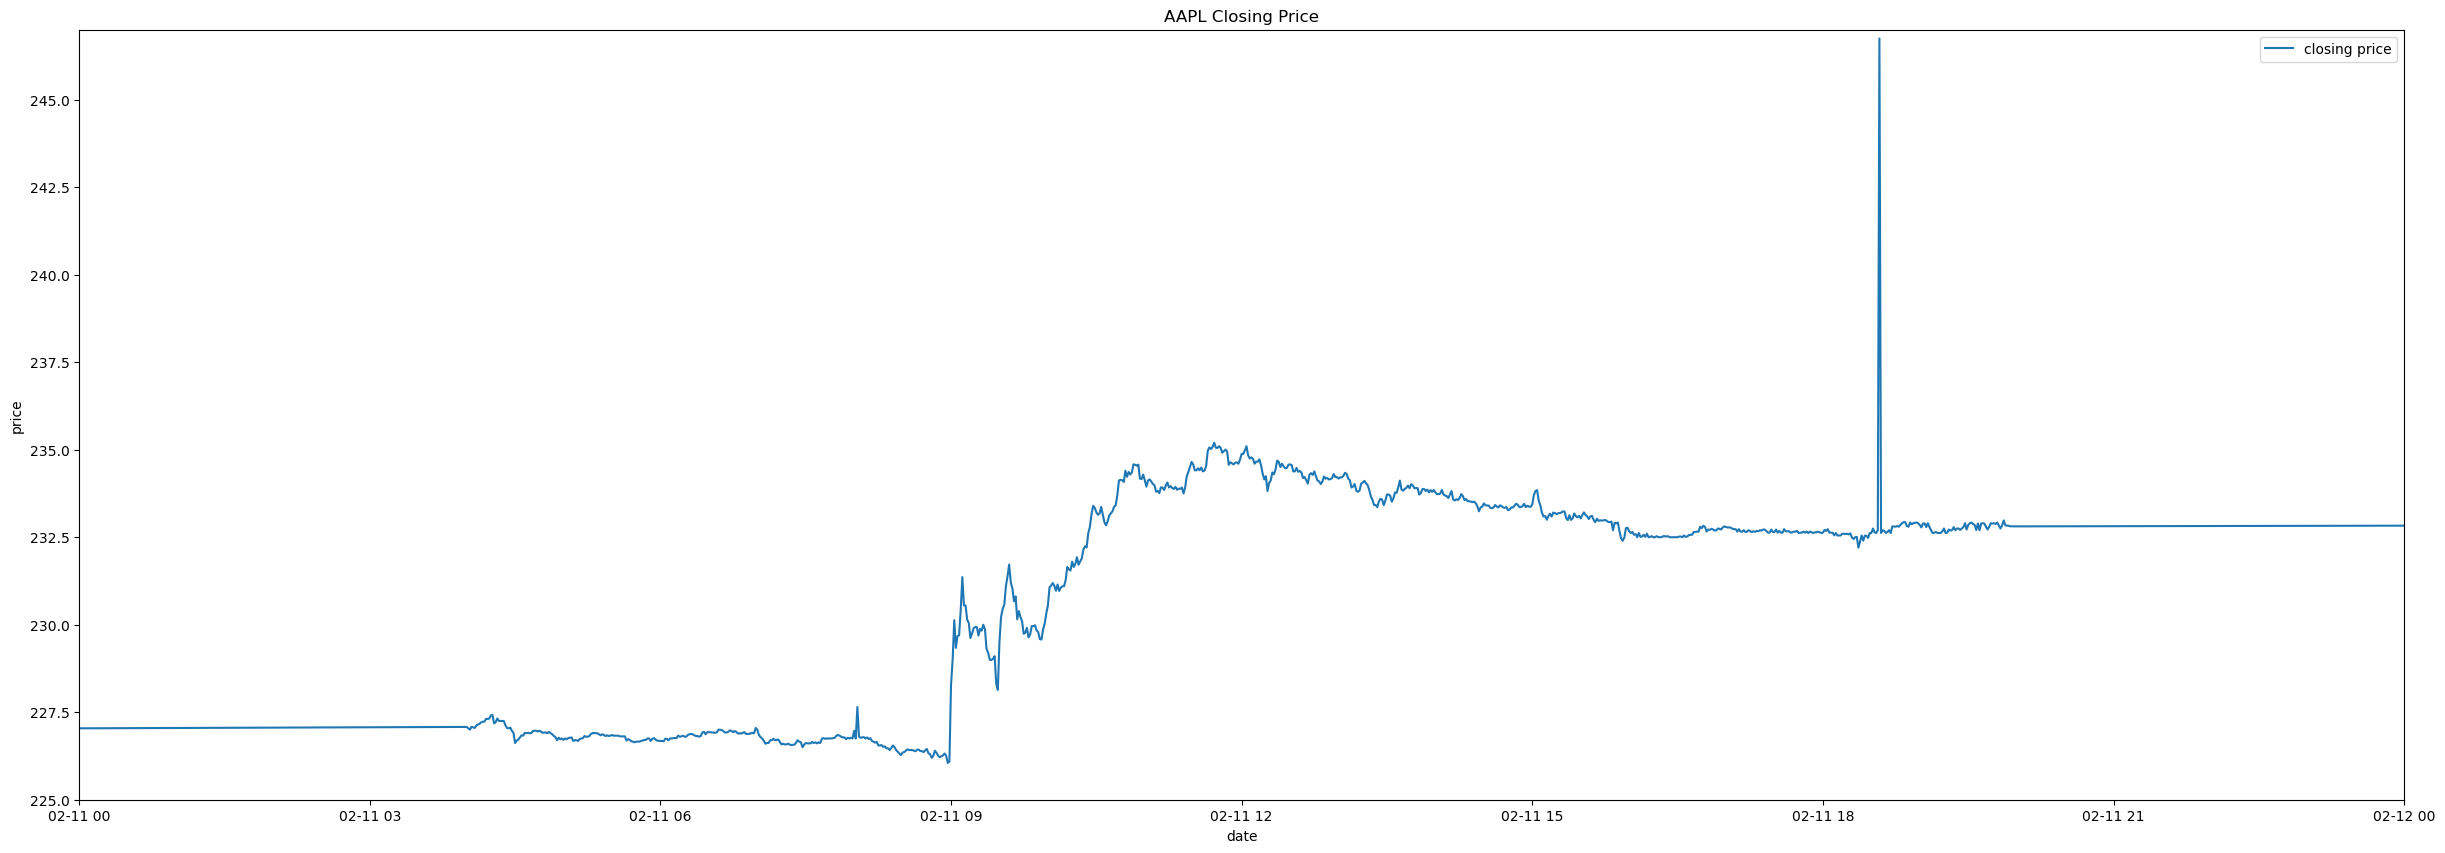

In [10]:
plt.figure(figsize=(30, 10))
plt.plot(df['close'], label='closing price')
plt.xlim([pd.to_datetime('2025-02-11'), pd.to_datetime('2025-02-12')])
plt.ylim((225, 247))
plt.title('AAPL Closing Price')
plt.xlabel('date')
plt.ylabel('price')
plt.legend()
plt.show()

<Axes: xlabel='date'>

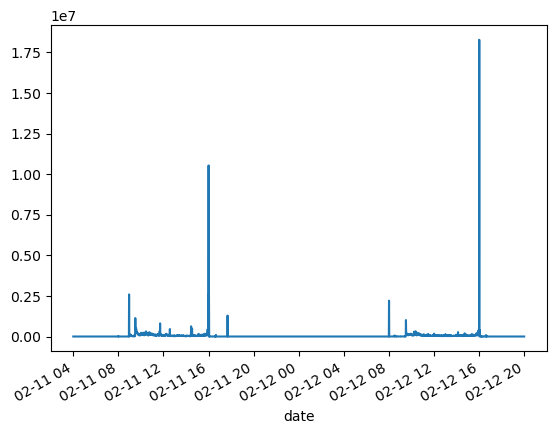

In [11]:
df_sorted = df.sort_index()
df_sorted.loc['2025-02-11':'2025-02-12'].volume.plot()

C:\Users\Asura\AppData\Local\Temp\ipykernel_23056\1421576017.py:1: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_sorted.resample('S').ffill().high.plot(figsize=(30, 10))


<Axes: xlabel='date'>

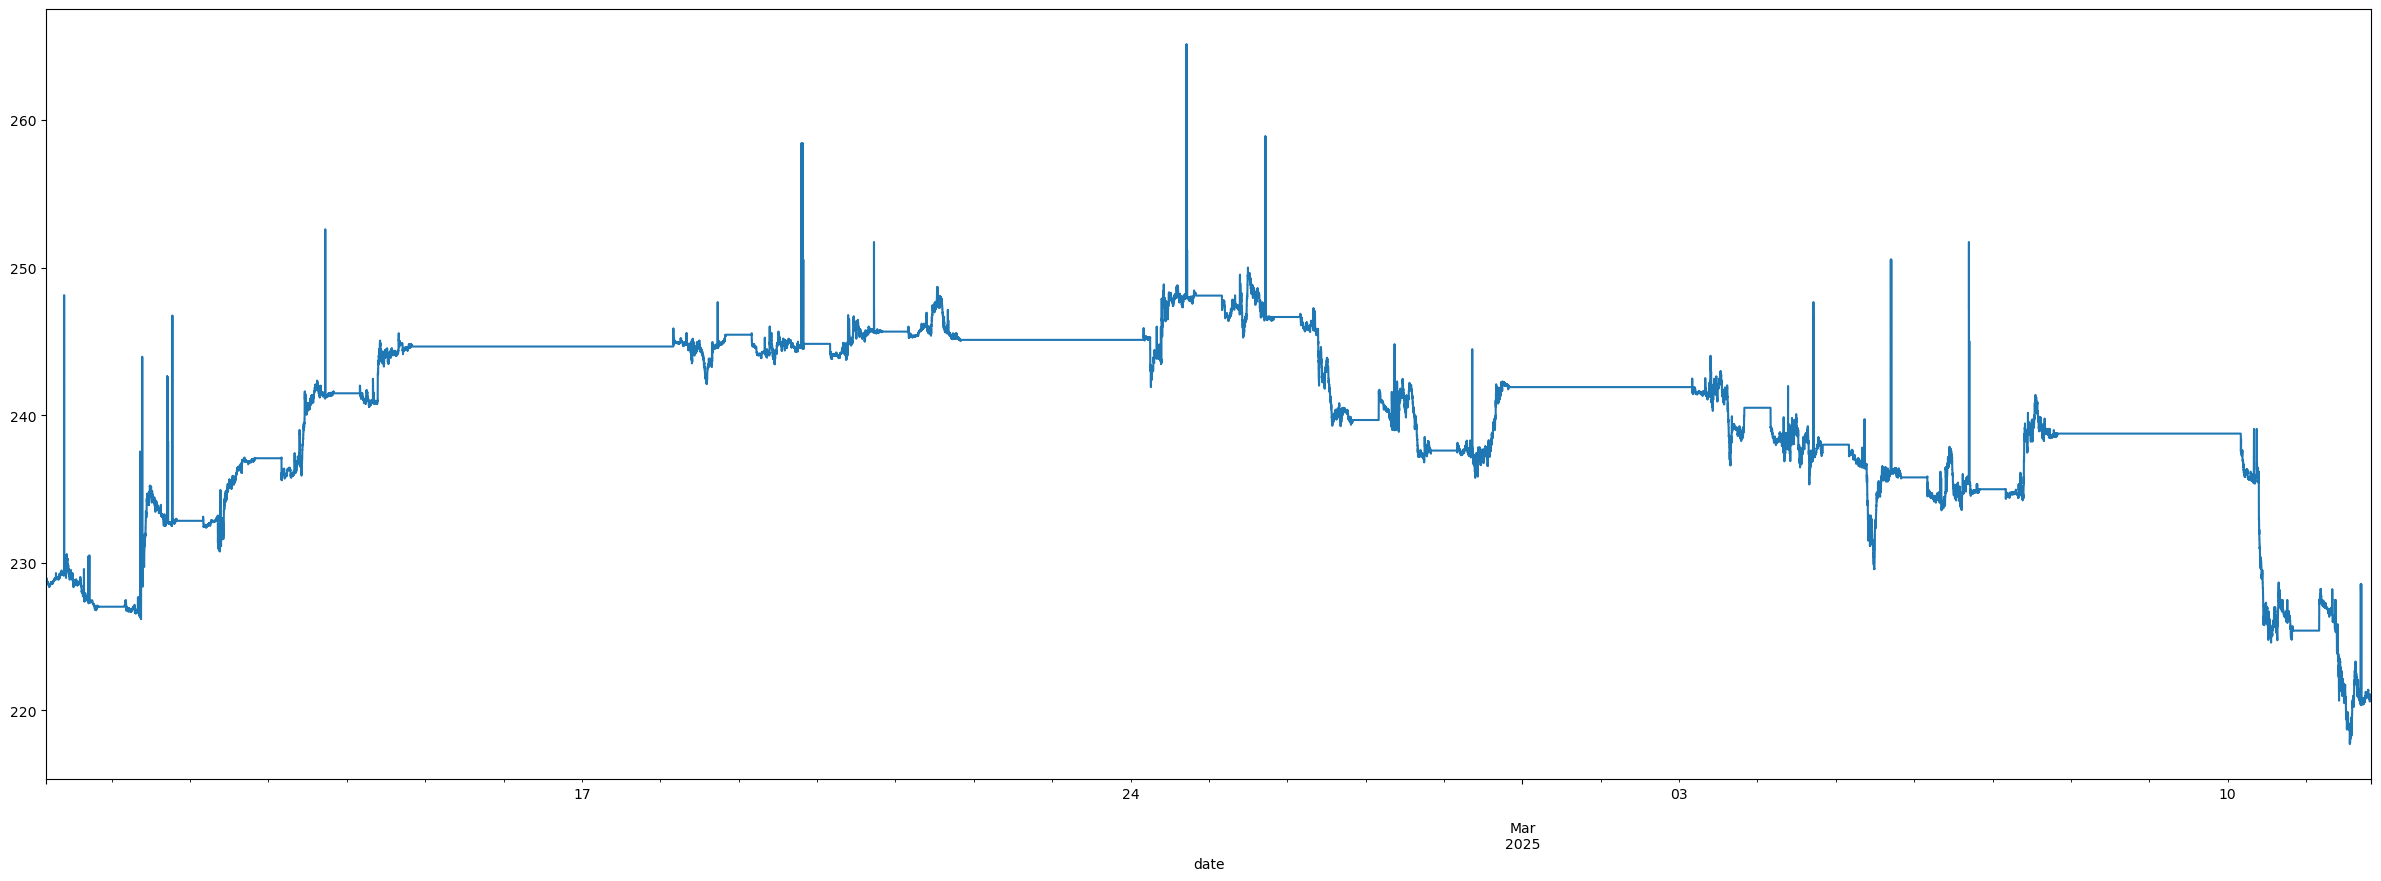

In [25]:
df_sorted.resample('S').ffill().high.plot(figsize=(30, 10))

In [27]:
df_sorted['close with rolling 30'] = df_sorted.rolling(window=30).mean().close

<Axes: xlabel='date'>

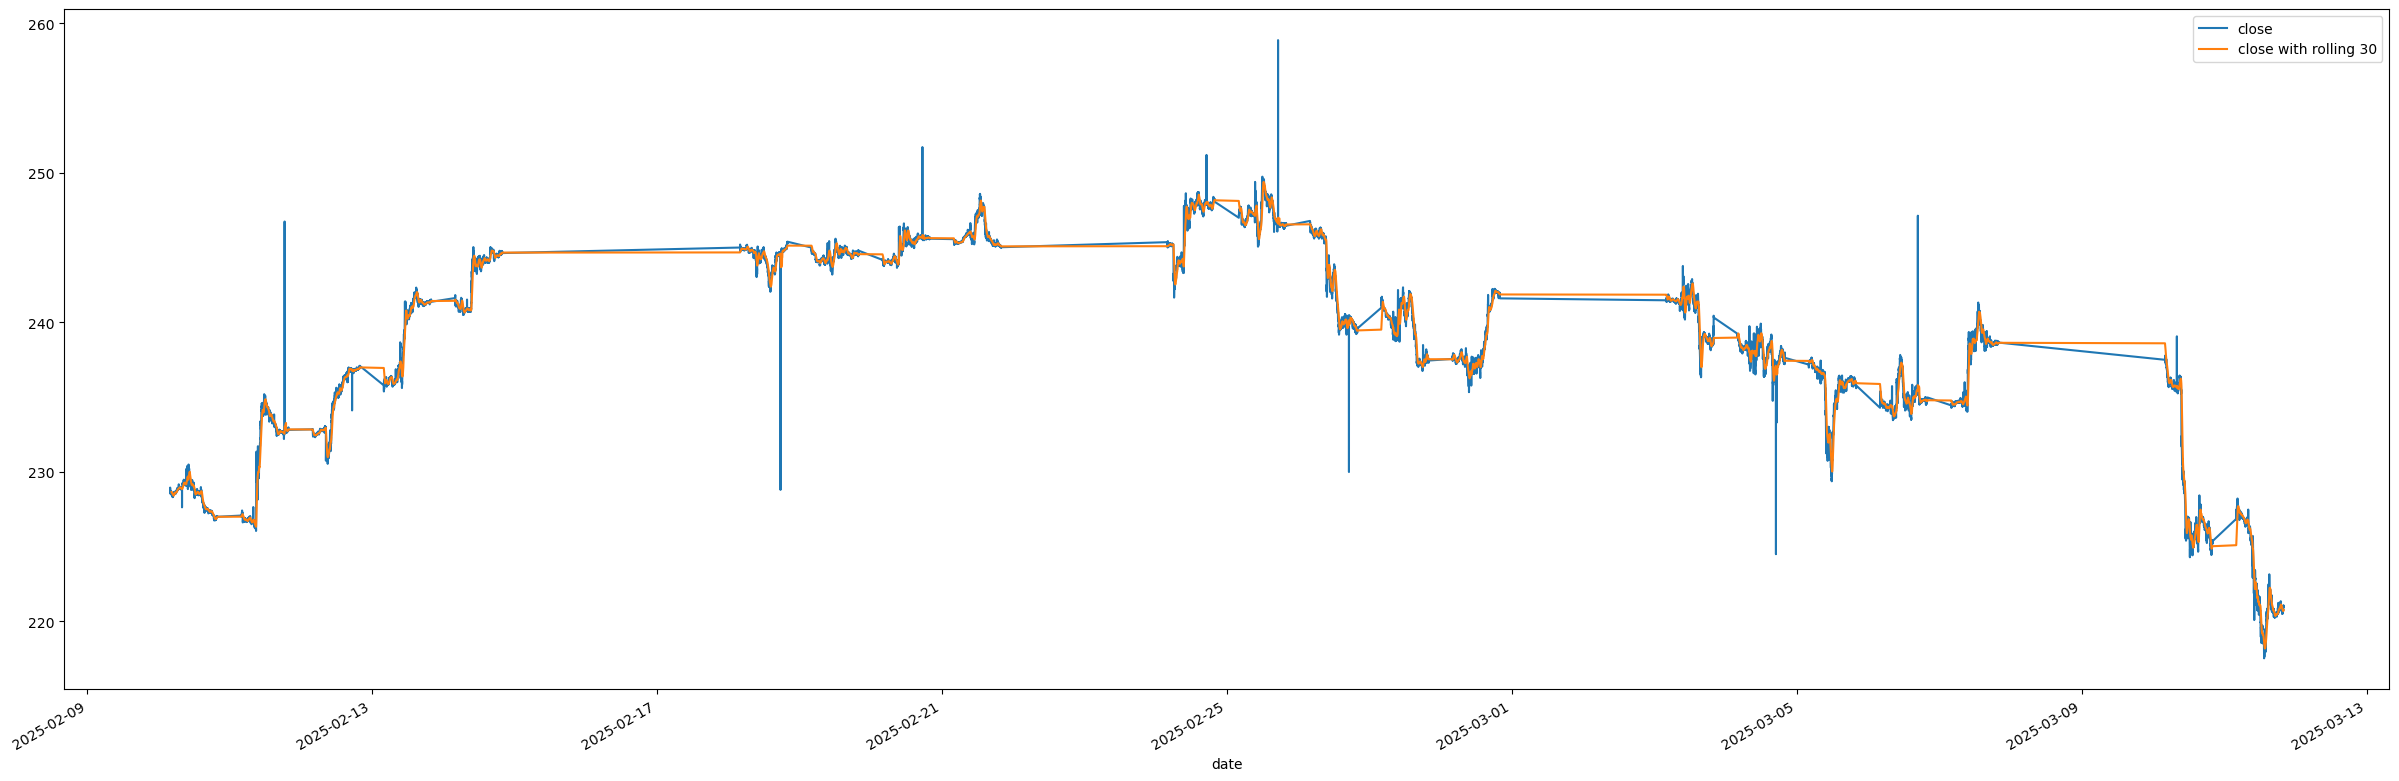

In [28]:
df_sorted[['close', 'close with rolling 30']].plot(figsize=(30, 10))

In [32]:
df2 = df_sorted.loc[pd.to_datetime('2025-02-17'):pd.to_datetime('2025-03-01')]
df2[df2.close == df2.close.max()]

,open,high,low,close,volume,close with rolling 30
date,,,,,,
2025-02-25 17:14:00,246.57,258.8842,246.5101,258.8842,729.0,247.005977


In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[['open', 'high', 'low', 'close', 'volume']])
df_scaled

array([[6.60326377e-01, 3.22819875e-01, 6.78994748e-01, 4.11596386e-01,
        2.34766798e-05],
       [6.58886056e-01, 3.21536807e-01, 6.79286837e-01, 4.13050369e-01,
        1.91201826e-05],
       [6.58883176e-01, 3.21534241e-01, 6.78994748e-01, 4.11596386e-01,
        1.86707027e-06],
       ...,
       [4.68334558e-01, 1.54096451e-01, 4.85199876e-01, 2.19821858e-01,
        1.30694919e-05],
       [4.67473246e-01, 1.57173248e-01, 4.85784053e-01, 2.20691340e-01,
        2.16441850e-05],
       [4.71788446e-01, 1.64094116e-01, 4.77322250e-01, 2.18367875e-01,
        8.05260491e-05]])